In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreeyash6199","key":"fa0ace82f613ab882fd3fb0b94916db0"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

>Now download kaggle dataset.

In [7]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 94%|██████████████████████████████████████▍  | 254M/271M [00:02<00:00, 118MB/s]
100%|█████████████████████████████████████████| 271M/271M [00:02<00:00, 132MB/s]
 99%|████████████████████████████████████████▋| 539M/544M [00:04<00:00, 189MB/s]
100%|█████████████████████████████████████████| 544M/544M [00:04<00:00, 140MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 53.2MB/s]


In [8]:
!ls

kaggle.json  sample_data  sample_submission.csv  test.zip  train.zip


In [9]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test/10014.jpg          
  inflating: test/10015.jpg          
  inflating: test/10016.jpg          
  inflating: test/10017.jpg          
  inflating: test/10018.jpg          
  inflating: test/10019.jpg          
  inflating:

In [10]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin



*   import all required libraries 
*   we will use tensorflow layers framework.



In [0]:
import os
import cv2
import random
import numpy
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline



> **Preprocessing Images**

> >resizing images to shape (100,100,3) and then storing dataset into a numpy array. OpenCV is used for basic processing on images.



In [0]:
images = []
labels = []

for img in os.listdir('train/'):
    path = "train/" + str(img) 
    image = cv2.imread(str(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64))
    images.append(image)
    if img[:3] == "cat":                  # cat >> 0
        labels.append(int(0))
    elif img[:3] == "dog":                # dog >> 1
        labels.append(int(1))

images = numpy.array(images)
labels = numpy.array(labels)        

> > Note that here I am reshaping y_train and y_test array to [-1,1] because it will convert its shape from (?, ) to (?, 1). It will reduce future errors. 

In [31]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(images, labels, test_size=0.05)
y_train = numpy.asarray(y_train, dtype = 'int')
y_train = numpy.reshape(y_train,[-1,1])
y_test = numpy.reshape(y_test,[-1,1])


dtype('int64')

array([1])

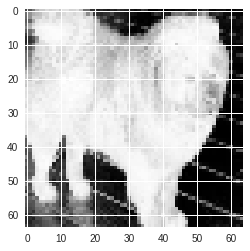

In [14]:
gray = cv2.cvtColor(X_test[1], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
y_test[1]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X = tf.placeholder(tf.float32, shape = [None, 64, 64, 3], name = 'X')
y = tf.placeholder(shape = [None, 1], name = 'y', dtype='int64')

In [0]:
conv1 = tf.layers.conv2d(inputs = X, name = 'conv1', padding = 'same', activation='relu', filters = 32, kernel_size = 3)
max_pool_1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=2, strides = 2, padding= 'valid')
conv2 = tf.layers.conv2d(inputs = max_pool_1, name = 'conv2', padding = 'same', activation='relu', filters = 64, kernel_size = 3)
max_pool_2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=2, strides = 2, padding= 'valid')
conv3 = tf.layers.conv2d(inputs = max_pool_2, name = 'conv3', activation='relu', filters = 128, kernel_size = 3)
max_pool_3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=2, strides = 2)
conv4 = tf.layers.conv2d(inputs = max_pool_3, name = 'conv4', activation='relu', filters = 256, kernel_size = 3)
max_pool_4 = tf.layers.max_pooling2d(inputs=conv4, pool_size=2, strides = 2, padding= 'valid')
flatten = tf.contrib.layers.flatten(inputs = max_pool_4)
dense1 = tf.layers.dense(inputs = flatten, name = 'dense1', activation = tf.nn.relu, units = 256)
dense2 = tf.layers.dense(inputs = dense1, name = 'dense2', activation = tf.nn.relu, units = 256)
dense3 = tf.layers.dense(inputs = dense2, name = 'dense3', activation = None, units = 1)

In [18]:
for var in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES):
    print(var)

<tf.Variable 'conv1/kernel:0' shape=(3, 3, 3, 32) dtype=float32_ref>
<tf.Variable 'conv1/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>
<tf.Variable 'conv2/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'conv3/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>
<tf.Variable 'conv3/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'conv4/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>
<tf.Variable 'conv4/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'dense1/kernel:0' shape=(4096, 256) dtype=float32_ref>
<tf.Variable 'dense1/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'dense2/kernel:0' shape=(256, 256) dtype=float32_ref>
<tf.Variable 'dense2/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'dense3/kernel:0' shape=(256, 1) dtype=float32_ref>
<tf.Variable 'dense3/bias:0' shape=(1,) dtype=float32_ref>


In [0]:
logits = dense3

In [0]:
y_pred = tf.nn.sigmoid(logits)

In [0]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

In [0]:
learn_rate = tf.placeholder(tf.float32, name='learn_rate')
optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate).minimize(cost)

In [0]:
y_pred = tf.cast(y_pred, tf.float32)>0.5
z = y==1
    
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred,z), tf.float32))

In [35]:
epochs = 25
lr = 1e-5
array1 = []   # for train accuracy
array2 = []   # for test accuracy
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(epochs):
    for i in range(0,23500,128):
      _, train_acc = sess.run([optimizer, accuracy], feed_dict= {X: X_train[i:i+128], y: y_train[i:i+128], learn_rate:lr})
      test_acc = sess.run(accuracy, feed_dict = {X: X_test, y: y_test})
      array1.append(train_acc)
      array2.append(test_acc)
      #if all([epoch>1, (array1[epoch]-array1[epoch-1])<4]):
      #  lr = lr/10
    print("Epoch : ",epoch+1, " , train_accuracy : ", train_acc*100, " , test_accuracy : ", test_acc*100)
    
    

InvalidArgumentError: ignored

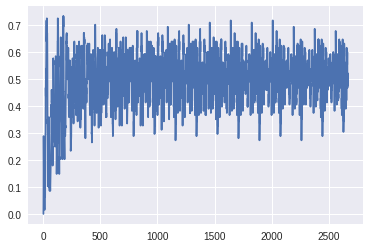

train accuracy curve


In [35]:
plt.plot(array1)
plt.show()
print('train accuracy curve')

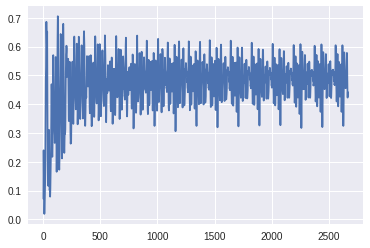

test accuracy curve


In [36]:
plt.plot(array2)
plt.show()
print('test accuracy curve')